In [1]:
#Loading and Inspecting the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading and Inspecting the Dataset

file_path = 'Flight_Fare.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [9]:
data.Price.value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: count, Length: 1870, dtype: int64

In [10]:
for column in data:
    print(column)

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops
Additional_Info
Price


In [11]:
# Data Preprocessing
data = data.dropna()

In [12]:
# Convert categorical variables into numerical ones using One-Hot Encoding
categorical_features = ['Airline', 'Source', 'Destination']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [13]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns


In [14]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [15]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [16]:
# Normalize/standardize numerical features if required
numerical_features = ['Duration']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [17]:
print("\nProcessed Data:")
data.head()


Processed Data:


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24.0,18.0,211.0,233.0,0.422830,4.0,8.0,3897.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,84.0,31.0,906.0,1.306644,1.0,8.0,7662.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43.0,118.0,70.0,413.0,-0.810827,1.0,8.0,13882.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10.0,91.0,164.0,1324.0,1.076484,0.0,8.0,6218.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,29.0,149.0,1237.0,1.002833,0.0,8.0,13302.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


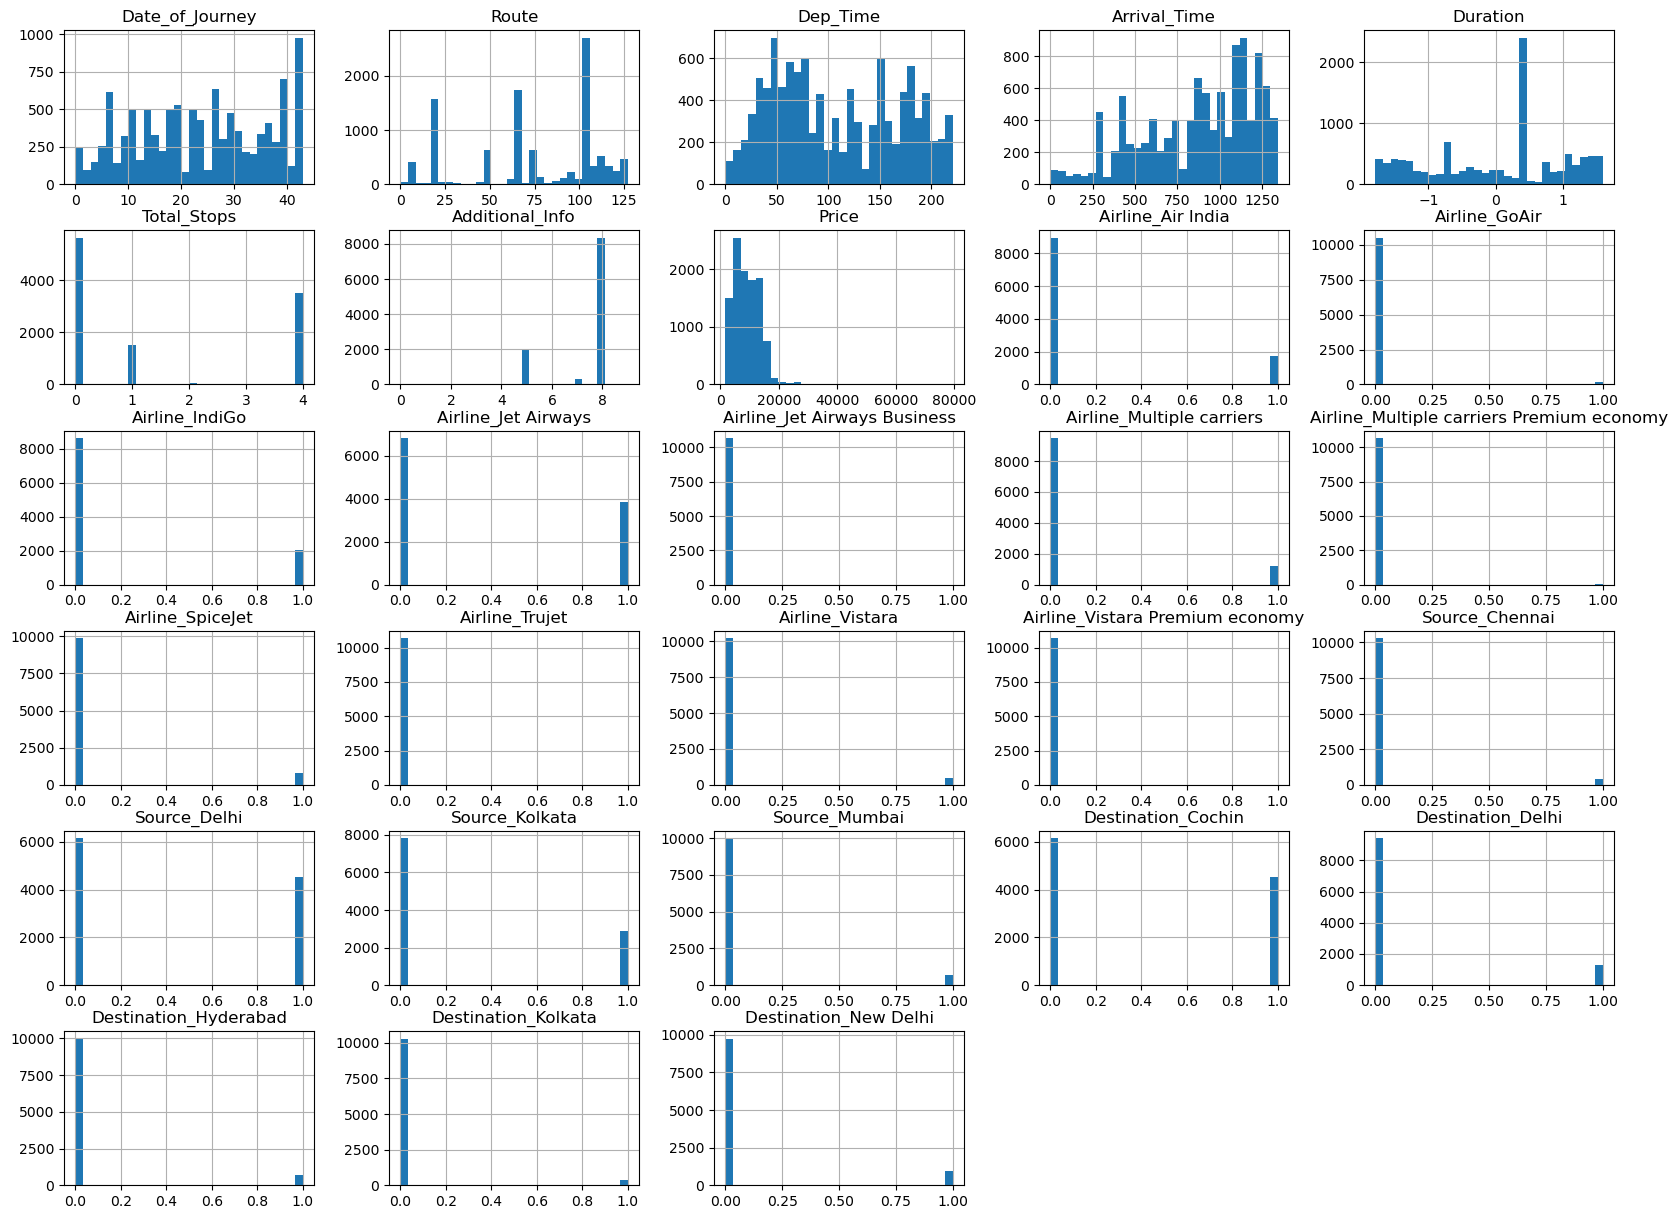

In [18]:
# Univariate Analysis
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()

In [19]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


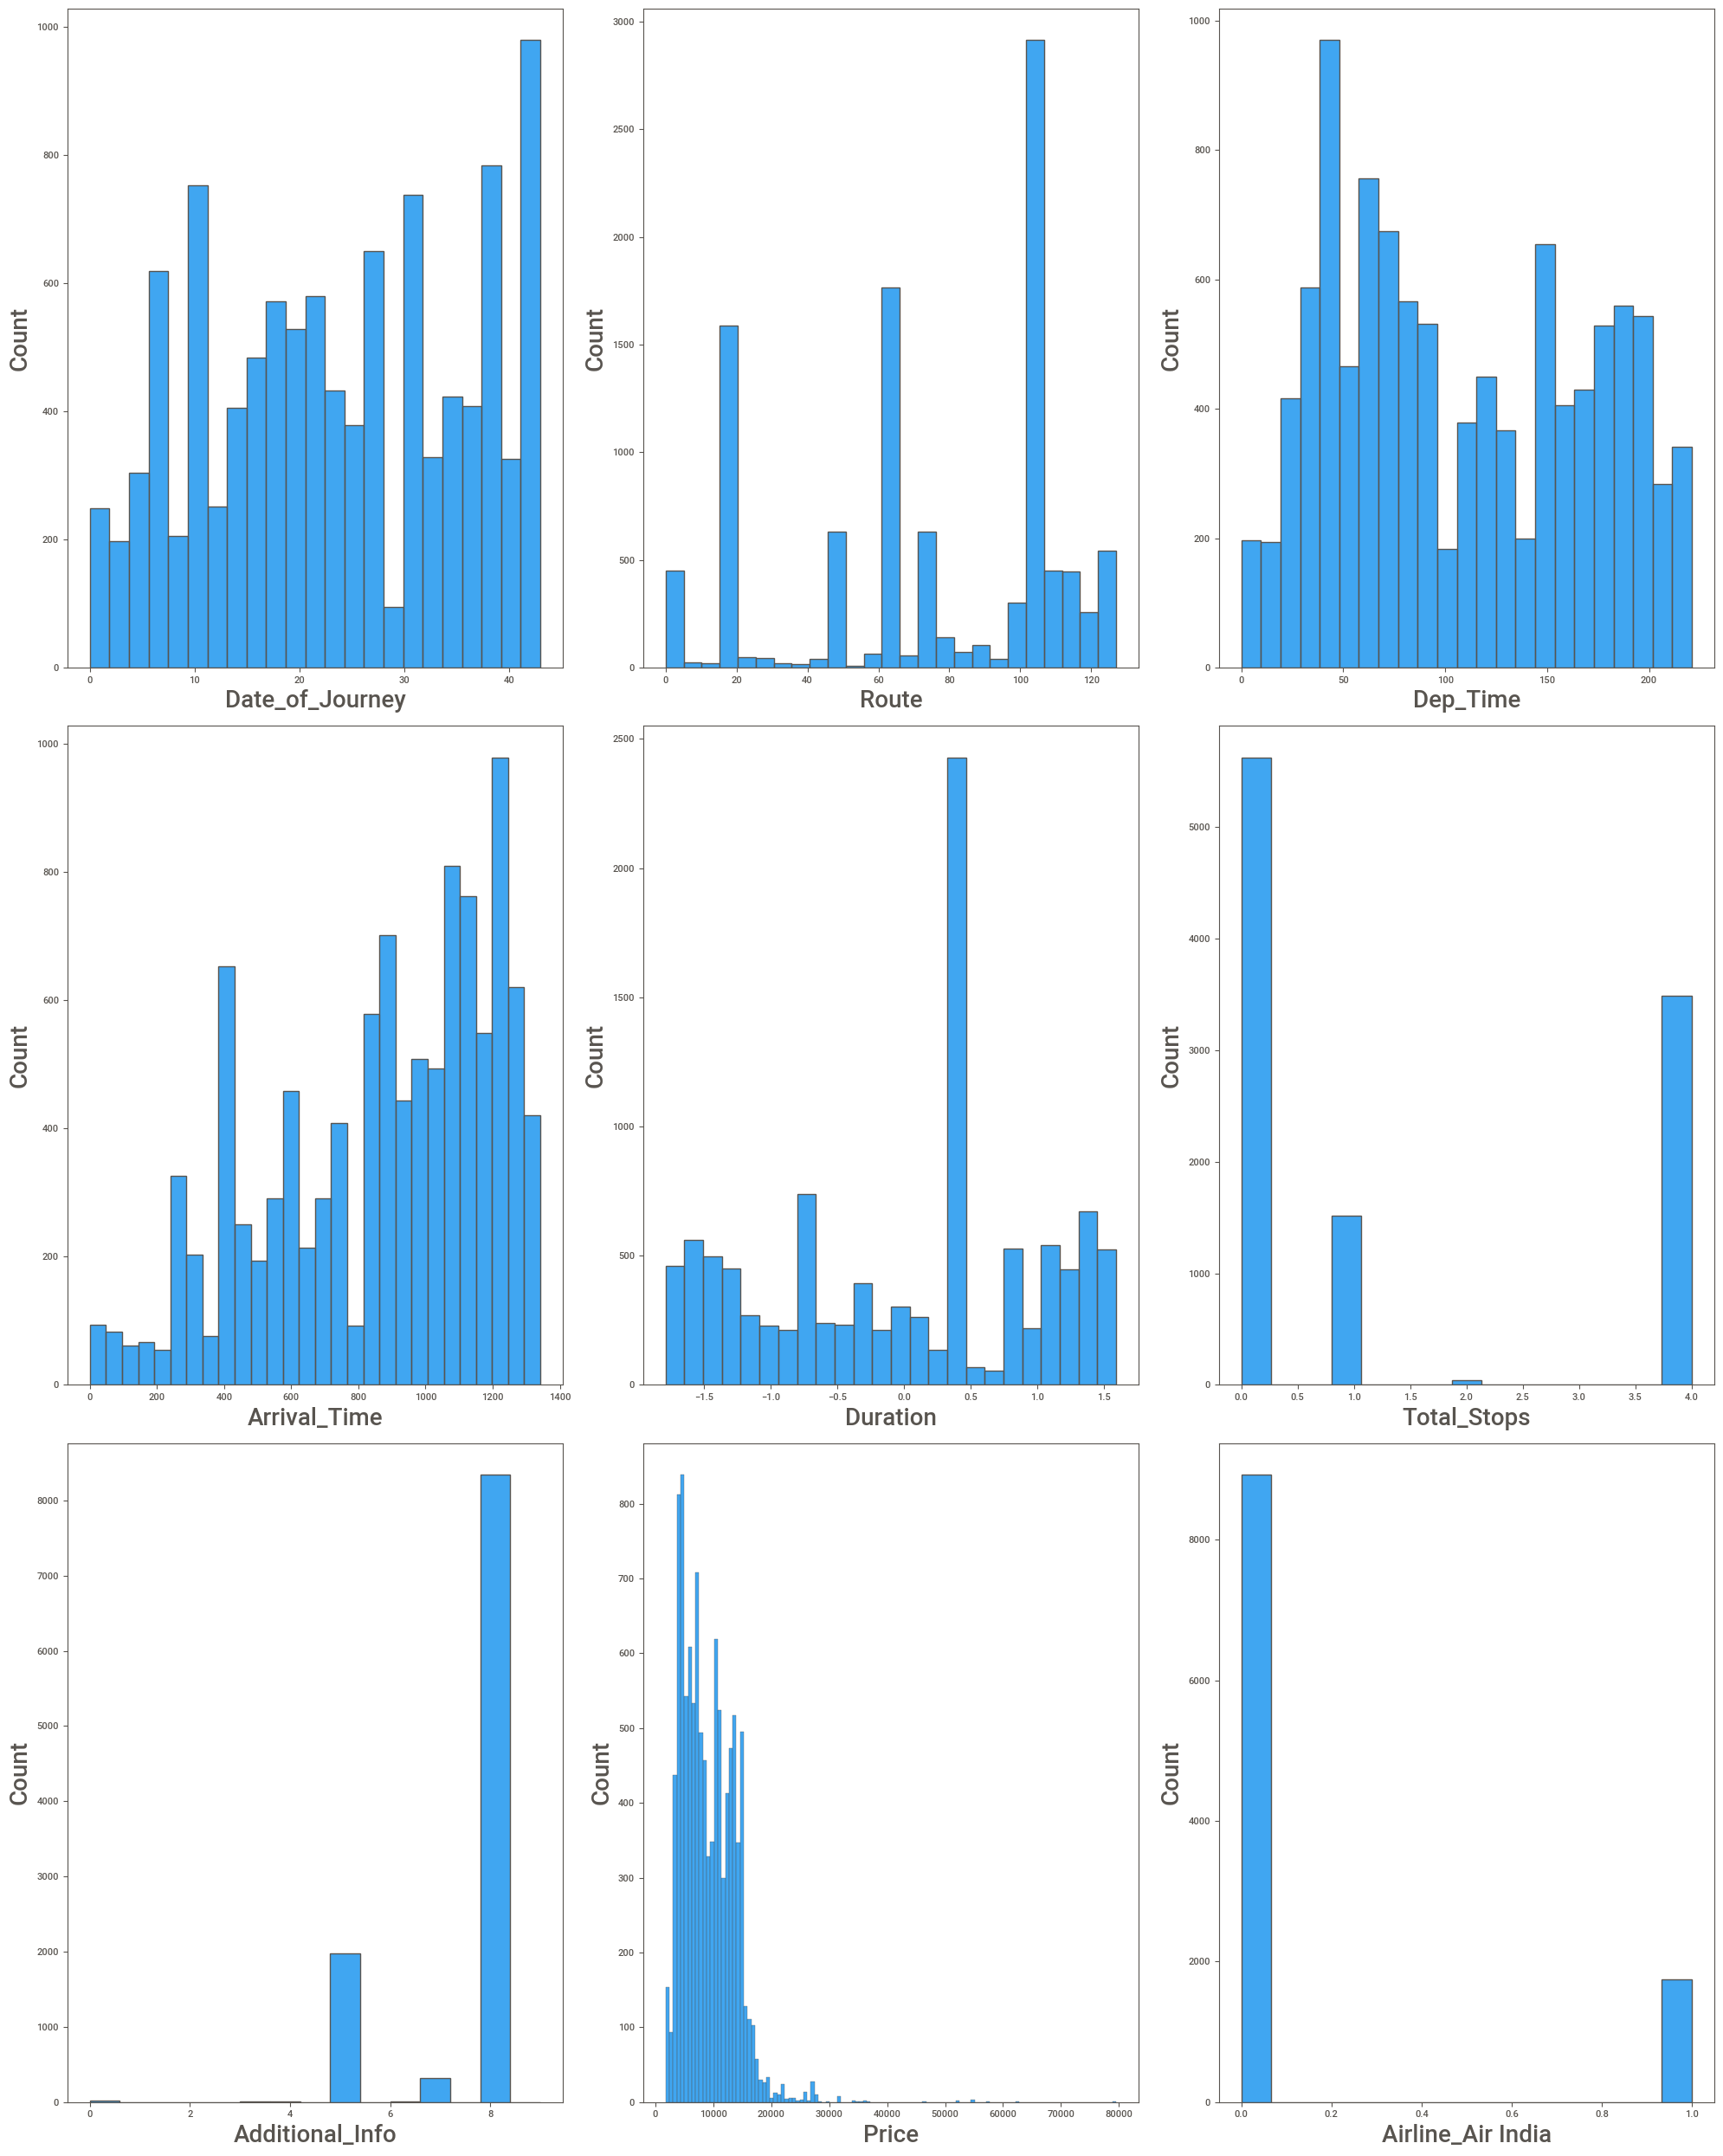

In [20]:
# Visualize histograms
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [21]:
# Insights:
# Feature Importance

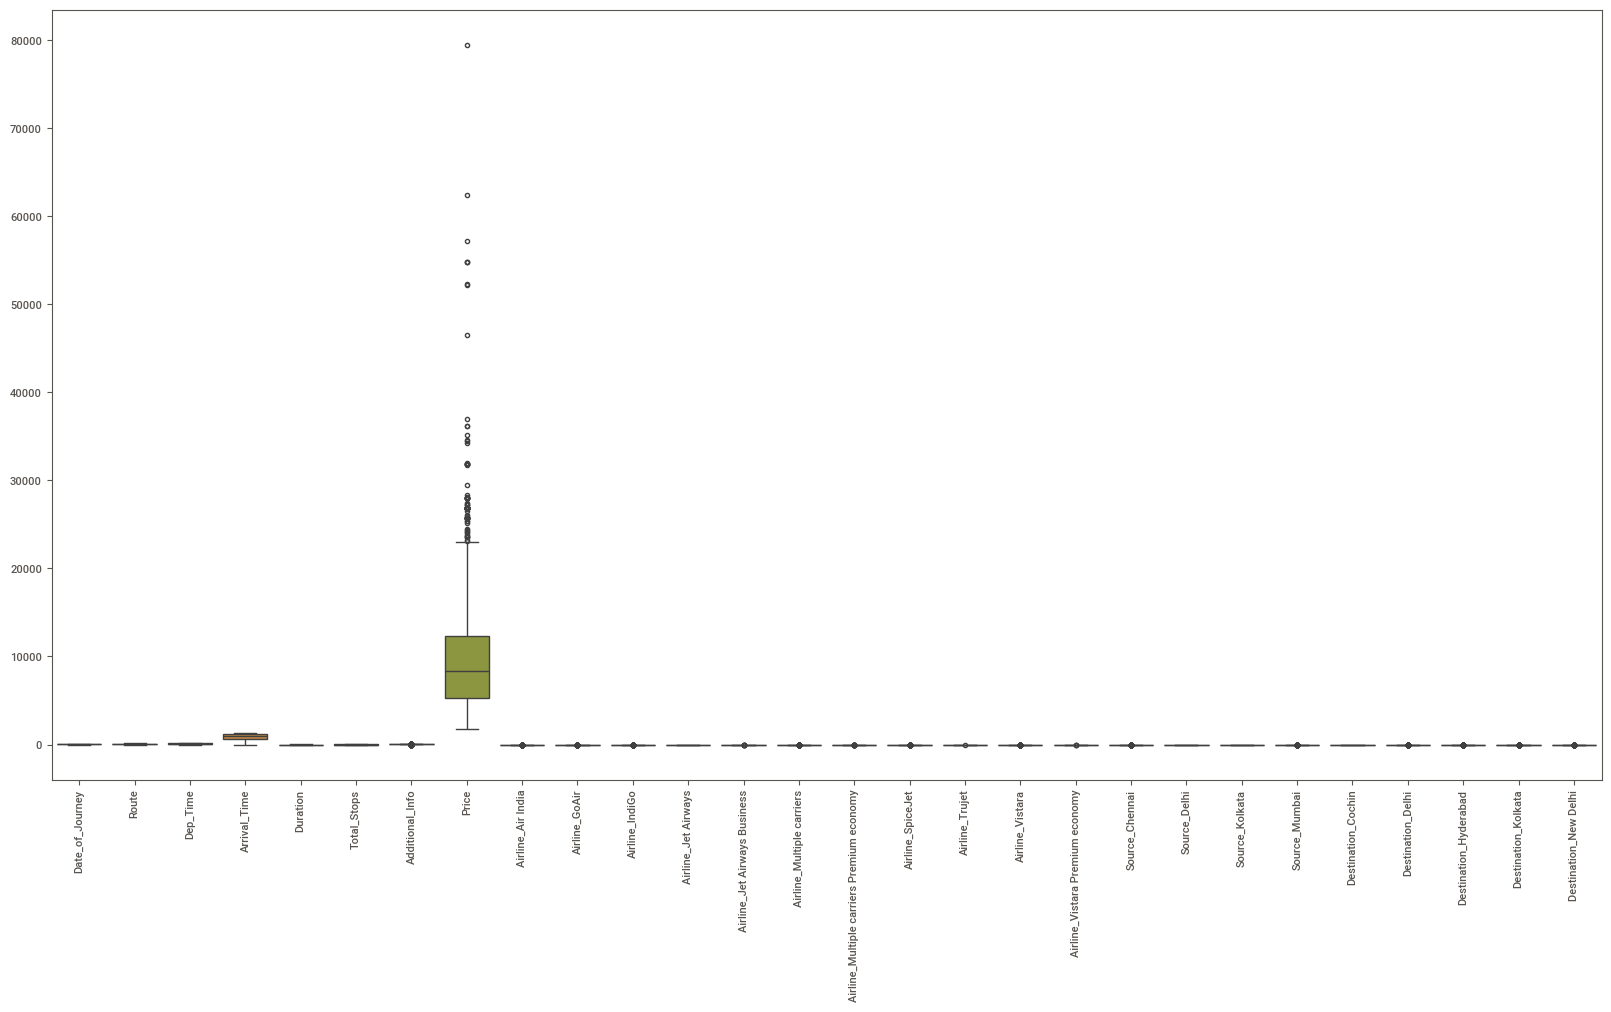

In [22]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [23]:
# Insights:
# Outliers: Boxplots highlight outliers, which are values that are significantly higher or lower than the rest of the data. These could indicate errors or special cases.
# Interquartile Range (IQR): The box represents the IQR, showing where the middle 50% of the data lies. A larger IQR indicates more variability in that feature.
# Median: The line in the middle of the box shows the median value of the feature.
# Comparisons: By plotting multiple features in one boxplot, you can easily compare the distributions and variability of different features.

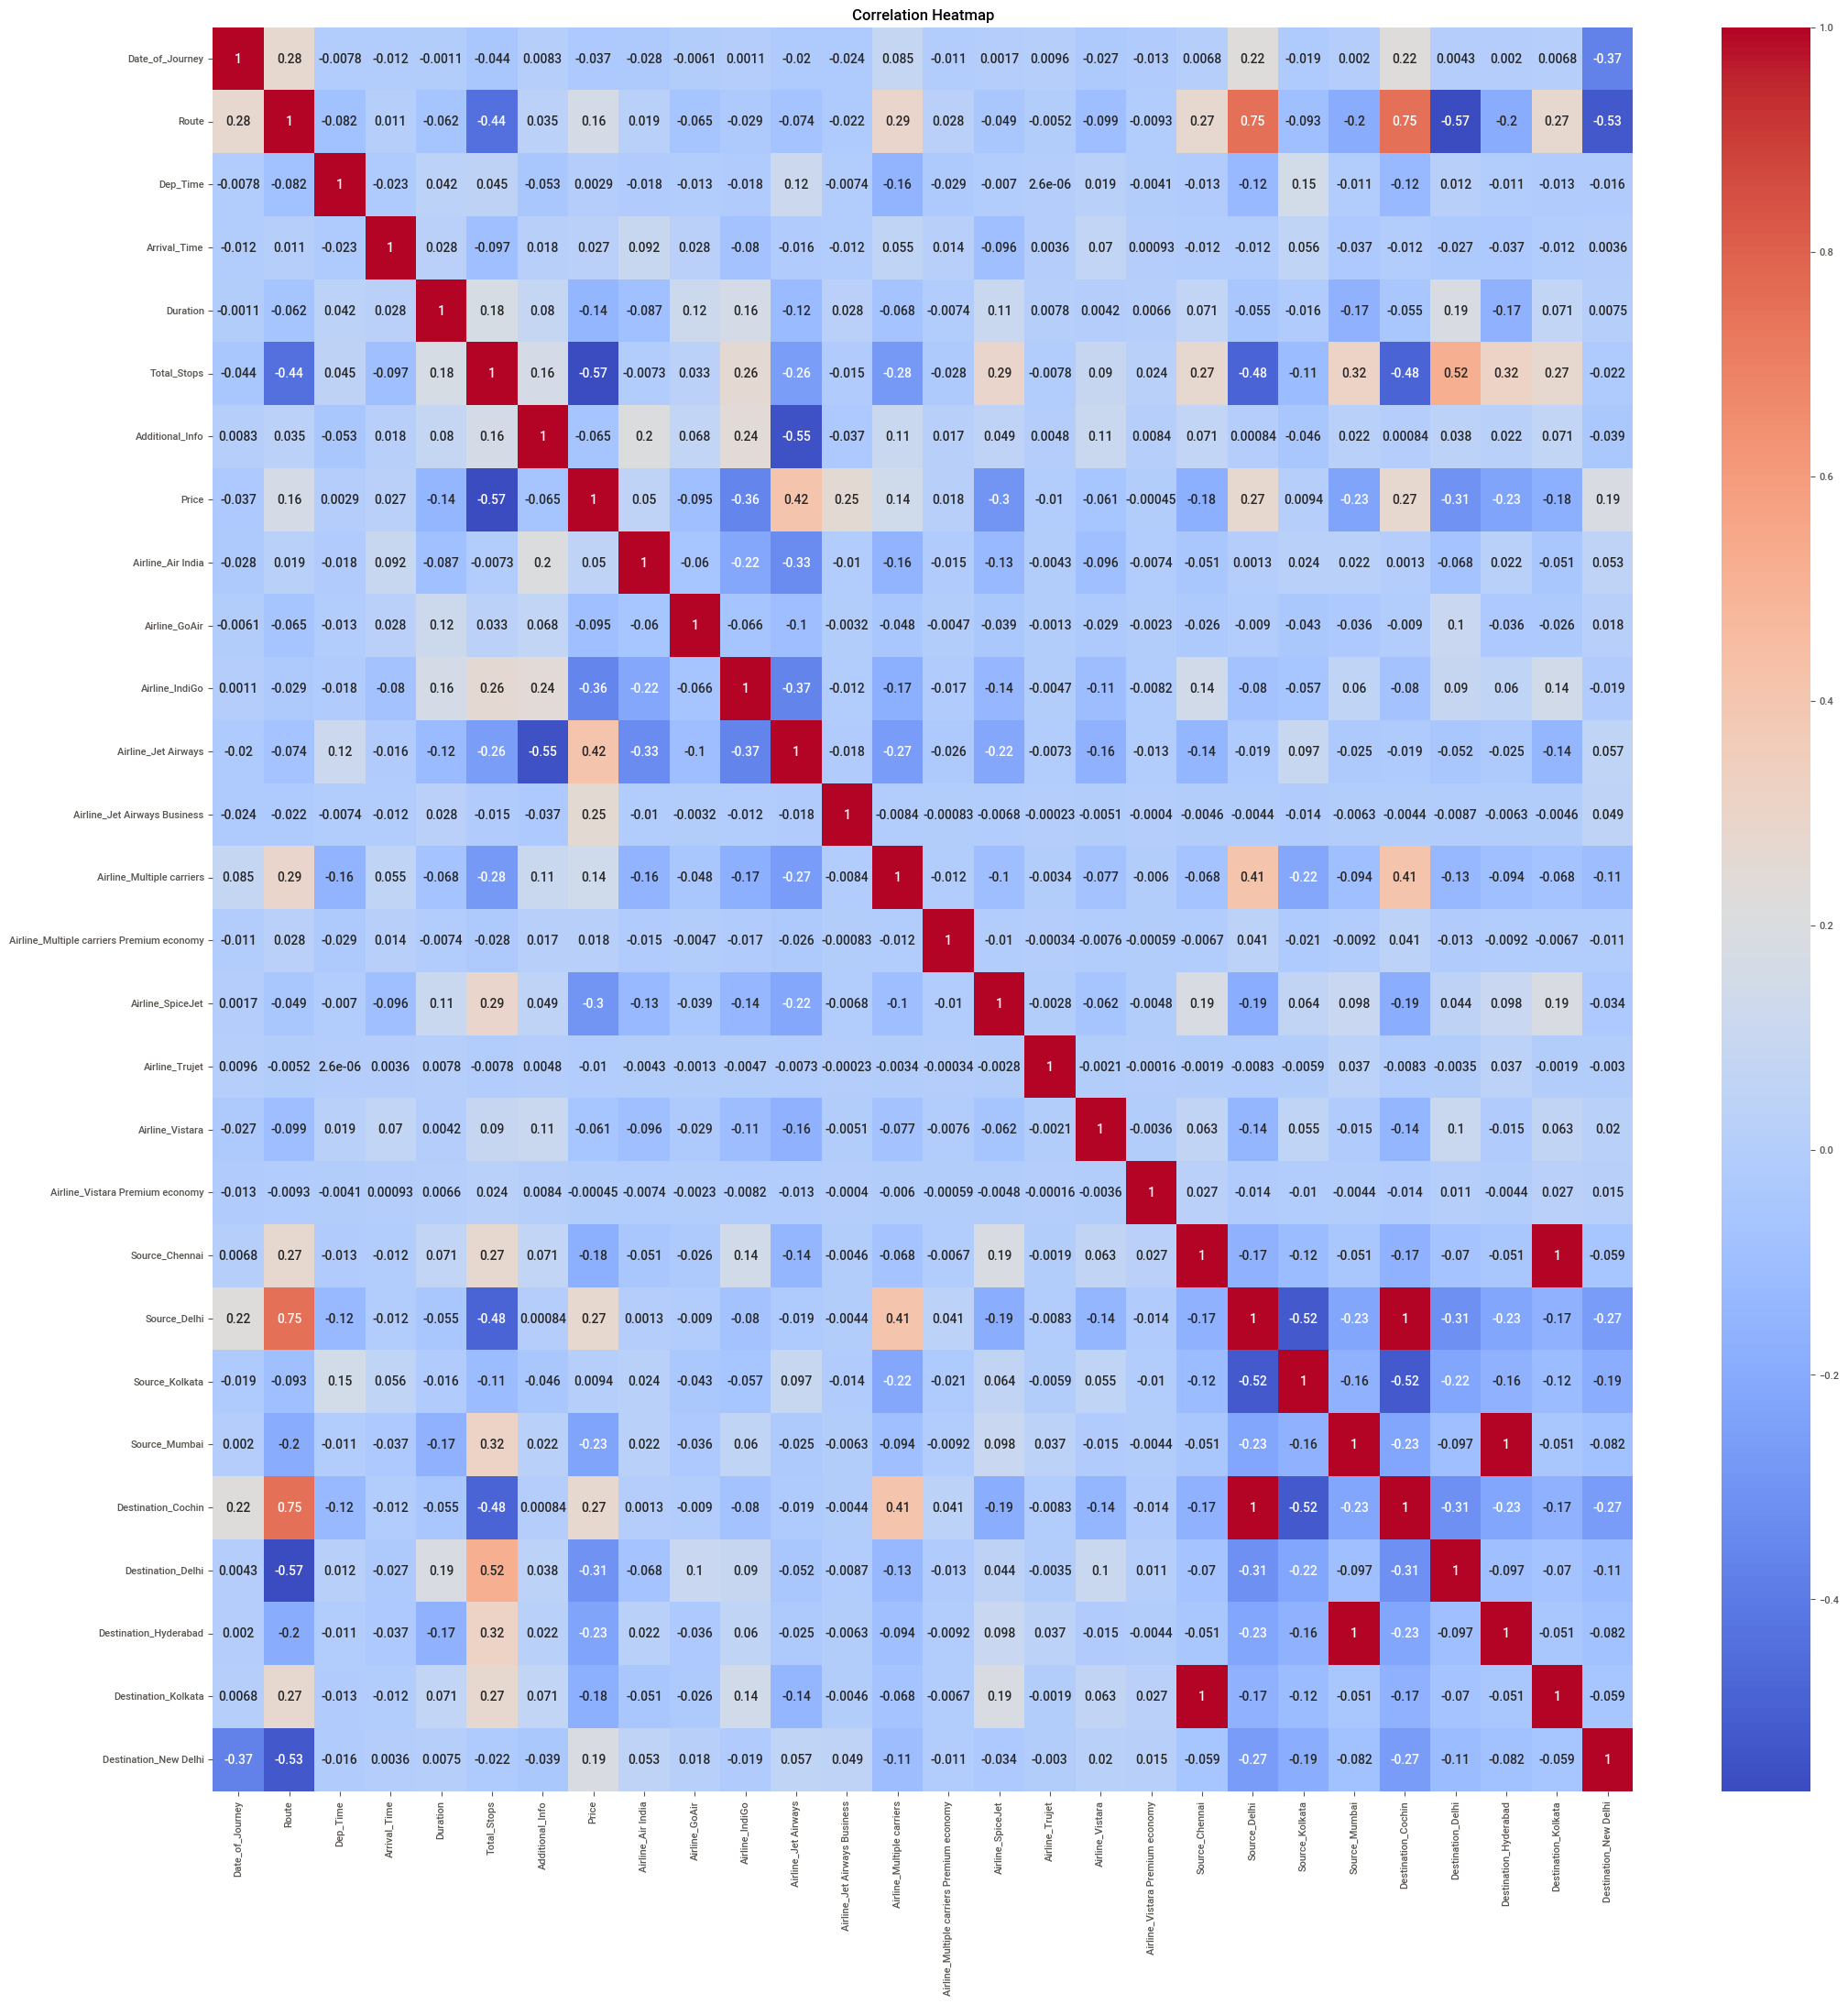

In [24]:
# Correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Insights:
# Correlation Strength: The heatmap shows the strength and direction of the correlation between features.
# Highly Correlated Features: Identify pairs of features that have high positive or negative correlations, which can indicate potential multicollinearity.
# Feature Selection: Use this to determine which features might be redundant and which ones are important for predictive modeling.

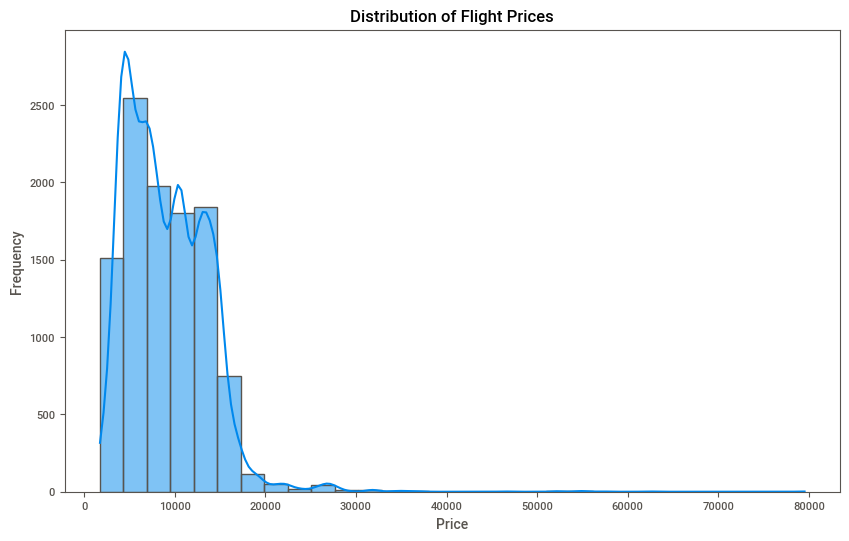

In [26]:
# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Insights:
# Skewness: The histogram of flight prices might show a right skew, indicating that while most flight prices are within a certain range, there are some very high prices.
# Central Tendency: The peak of the histogram indicates the most common price range for flights.   
# Spread: The width of the histogram shows how varied the flight prices are. A wider spread indicates more variability in prices.

In [ ]:
# Insights:
# Comparison: The bar plot allows us to compare the average prices across different airlines.
# High and Low Prices: Identify which airlines typically have higher or lower prices.
# Market Positioning: Understand how airlines are positioned in the market in terms of pricing.

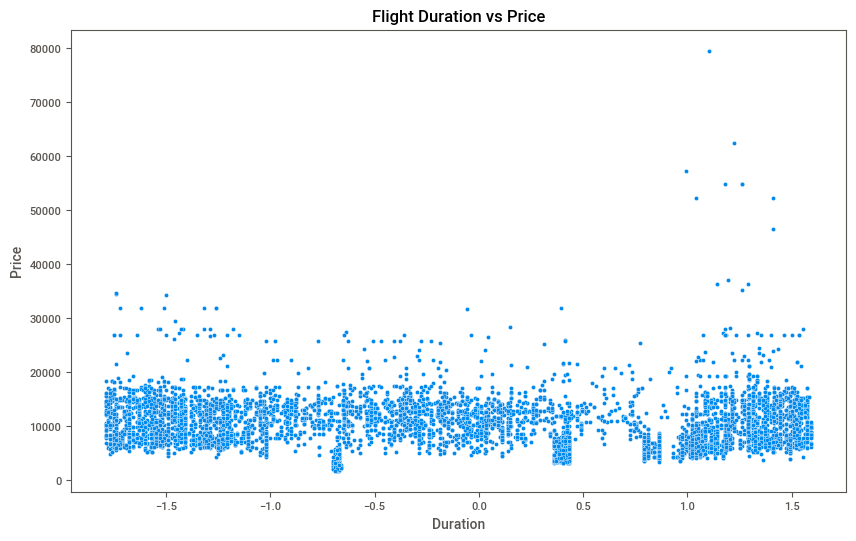

In [30]:
# Relationship between features and target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Duration'], y=data['Price'])
plt.title('Flight Duration vs Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [ ]:
# Insights:
# Relationship: The scatter plot helps to understand the relationship between flight duration and price.
# Trend: If there's a positive trend (points going upwards), it indicates that longer flights tend to be more expensive.
# Clusters: Look for any clusters of points that might indicate different pricing strategies for different flight durations.
# Outliers: Identify any outliers, such as unusually high prices for short flights or unusually low prices for long flights.

In [31]:
# Model Selection and Training
# Define features and target
X = data.drop('Price', axis=1)
y = data['Price']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.svm import SVR

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
from sklearn.feature_selection import RFE
rfe =RFE(lr, n_features_to_select=3)
rfe.fit(X,y)

for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}


In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
   

In [ ]:
# Model Deployment
# Function to predict flight prices
def predict_flight_price(model, input_data):
    return model.predict(input_data)

In [ ]:
# Example usage
# Assuming we use the Random Forest model
final_model = models['Random Forest']

In [ ]:
# Define example input data
duration_value = 120  # Example duration in minutes

In [ ]:
# Normalize the duration value
normalized_duration = scaler.transform([[duration_value]])[0][0]

In [ ]:
#'data' is the preprocessed DataFrame used for model training
feature_names = X.columns.tolist()
print("Features used during model training:")
print(feature_names)

In [ ]:
# Create a dictionary with all features, initially setting them to 0 or appropriate default values
new_data_dict = {feature: [0] for feature in X.columns}

In [ ]:
# Set the appropriate feature values based on your example
# Normalize numerical features
new_data_dict['Duration'] = [normalized_duration]

In [ ]:
# Set categorical features
# Here we assume the following example categories:
# Airline = 'IndiGo', Source = 'Delhi', Destination = 'Banglore'
new_data_dict['Airline_IndiGo'] = [1]
new_data_dict['Source_Delhi'] = [1]
new_data_dict['Destination_Banglore'] = [1]

In [ ]:
# Convert to DataFrame
new_data = pd.DataFrame(new_data_dict)

In [ ]:
# Ensure all columns in new_data match those in feature_names
new_data = new_data[feature_names]

In [ ]:
# Predicting flight price
predicted_price = predict_flight_price(final_model, new_data)
print(f"Predicted Flight Price: {predicted_price[0]}")

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
forest= RandomForestRegressor()
forest.fit(X_train, y_train)

In [ ]:
forest.score(X_test, y_test)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


In [ ]:
tree.score(X_test, y_test)

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

In [ ]:
svr.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define additional models
models.update({
    'k-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
})

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

In [ ]:
gbr.score(X_test, y_test)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
# Perform Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')


In [ ]:
# Fit the model (Takes 5-10 min for execution )

grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
# Evaluate the tuned model on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
print("\nTuned Random Forest Model")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

In [ ]:
# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Model Comparison Report
print("Model Comparison Report")
print(results_df)

In [ ]:
# Business Case for Flight Price Prediction Model

# Problem Statement:-
# Flight ticket prices are notoriously volatile.
# Travelers often face the frustration of seeing ticket prices vary drastically within short periods. 
# For airlines, setting optimal prices that maximize occupancy rates while ensuring profitability i s complex.

# Objectives:- 
# Improve Pricing Strategies: Enable airlines to set competitive and profitable prices by accurately predicting future flight prices.
# Enhance Customer Experience: Provide travelers with reliable price predictions to help them plan their journeys better, 
# fostering loyalty and trust.
# Increase Revenue: Optimize pricing to balance occupancy rates and profit margins, ensuring higher revenue for airlines.

# Scope:- 
# Data Analysis: Conduct comprehensive data analysis on historical flight data to identify key factors influencing price fluctuations.
# Predictive Modeling: Develop and deploy a machine learning model capable of predicting flight prices with high accuracy.
# Integration: Integrate the predictive model into airline booking systems and travel websites for real-time price predictions.
# User Interface: Develop an intuitive interface for travelers to access price predictions and plan their bookings accordingly.

# Methodology:-
# Data Collection: Gather historical data on flight prices, including details on airlines, 
# routes, departure and arrival times, dates, and other relevant factors.
# Data Preprocessing: Clean and preprocess the data to handle missing values, normalize numerical features, 
# and convert categorical variables into numerical representations using techniques like one-hot encoding.
# Exploratory Data Analysis (EDA): Perform EDA to uncover patterns, correlations, and insights that can inform the model development.
# Model Development: Train multiple machine learning models (e.g., Linear Regression, Random Forest) and select the best-performing 
# model based on metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) scores.
# Model Evaluation: Validate the model's performance using a test dataset to ensure accuracy and reliability.
# Deployment: Deploy the model in a production environment, integrating it with existing booking systems and travel platforms.
# User Interface Development: Create a user-friendly interface for travelers to access price predictions and make informed booking decisions.

# Expected Benefits:-
# For Airlines:
# Optimized Pricing: Set data-driven prices that maximize occupancy and profitability.
# Revenue Growth: Increase revenue through better pricing strategies and higher ticket sales.
# Competitive Advantage: Stand out in the market by offering predictive pricing services.

# For Travelers:
# Informed Decisions: Plan trips better with reliable price predictions, reducing the stress of fluctuating prices.
# Cost Savings: Potentially save money by booking flights at optimal times.
# Enhanced Trust: Build trust in the airline brand through transparent and reliable pricing.

# Risks and Mitigation:-
# Data Quality: Incomplete or inaccurate data can lead to poor model performance.
# Mitigation: Implement robust data preprocessing and validation techniques.
# Model Accuracy: The model may not capture all factors influencing prices. 
# Mitigation: Continuously update and refine the model with new data and advanced algorithms.
# Integration Challenges: Technical difficulties in integrating the model with existing systems. 
# Mitigation: Collaborate closely with IT teams and conduct thorough testing.

# Cost and Resource Estimates:-
# Data Acquisition: Costs associated with obtaining historical flight data.
# Development: Expenses related to hiring data scientists, software engineers, and UI/UX designers.
# Infrastructure: Costs for cloud services, data storage, and computational resources.
# Maintenance: Ongoing expenses for model updates, system maintenance, and customer support.

# Timeline:-
# Data Collection and Preprocessing: 1-2 months
# Model Development and Evaluation: 2-3 months
# Integration and Testing: 1-2 months
# User Interface Development: 1-2 months
# Deployment and Rollout: 1 month

# Conclusion:-
# Developing a flight price prediction model presents a significant opportunity for airlines to optimize 
# pricing strategies and improve customer satisfaction. By leveraging machine learning, airlines can 
# stay competitive, increase revenue, and offer a superior booking experience to travelers. This 
# initiative aligns with the goals of enhancing operational efficiency and customer-centric services, 
# paving the way for sustained growth and innovation in the aviation industry.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date_of_Journey                            10682 non-null  float64
 1   Route                                      10682 non-null  float64
 2   Dep_Time                                   10682 non-null  float64
 3   Arrival_Time                               10682 non-null  float64
 4   Duration                                   10682 non-null  float64
 5   Total_Stops                                10682 non-null  float64
 6   Additional_Info                            10682 non-null  float64
 7   Price                                      10682 non-null  float64
 8   Airline_Air India                          10682 non-null  float64
 9   Airline_GoAir                              10682 non-null  float64
 10  Airline_IndiGo        